#     Plot maps

## Setup imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import notebook_prepare as pre

## Define plotting function

In [2]:
def plot_maps(df,wind_df,plotdir,key,label) :

    """
    Plot maps of aircraft track.
    """

    # Define the figure.
    fig,ax = pre.setup_map()

    # Define the data.
    lat_data = df['Latitude'][:]
    lon_data = df['Longitude'][:]
    alt_data = df['Altitude'][:]

    # Plot the data.
    plt.scatter(lon_data,lat_data,s=200,c=alt_data,cmap=plt.cm.summer,ec='black',zorder=3,transform=ccrs.PlateCarree())

    # Plot the colourbar.
    cb = plt.colorbar(ax=ax,orientation='horizontal',shrink=0.8,pad=0.05,extend='both')
    cb.ax.tick_params(labelsize=20)
    cb.set_label('Altitude / m',fontsize=20,labelpad=10)

    plt.show()
    # Save the figure.
    #plt.savefig(plotdir+key+'_Map_Track.png')
    #plt.close()

    """
    Plot maps of aircraft data.
    """

    # Define the figure.
    fig,ax = pre.setup_map()

    # Define the data.
    lat_data = df['Latitude'][:]
    lon_data = df['Longitude'][:]
    alt_data = df['Altitude'][:]
    a_min, a_avg, a_max, m_min, m_avg, m_max, bl_min, bl_avg, bl_max = pre.read_data_values(df)

    # Determine the minimum and maximum values.
    min = np.nanmin([np.nanmin(a_avg),np.nanmin(m_avg)])
    max = np.nanmax([np.nanmax(a_avg),np.nanmax(m_avg)])

    # Plot the data.
    plt.scatter(lon_data,lat_data,s=200,c=a_avg,cmap=plt.cm.Spectral_r,ec='black',vmin=min,vmax=max,zorder=3,transform=ccrs.PlateCarree())

    # Plot the colourbar.
    cb = plt.colorbar(ax=ax,orientation='horizontal',shrink=0.8,pad=0.05,extend='both')
    cb.ax.tick_params(labelsize=20)
    cb.set_label(label,fontsize=20,labelpad=10)

    plt.show()
    # Save the figure.
    #plt.savefig(plotdir+key+'_Map_Aircraft.png')
    #plt.close()

    """
    Plot maps of model data.
    """

    # Define the figure.
    fig,ax = pre.setup_map()

    # Define the data.
    lat_data = df['Latitude'][:]
    lon_data = df['Longitude'][:]
    alt_data = df['Altitude'][:]
    a_min, a_avg, a_max, m_min, m_avg, m_max, bl_min, bl_avg, bl_max = pre.read_data_values(df)

    # Determine the minimum and maximum values.
    min = np.nanmin([np.nanmin(a_avg),np.nanmin(m_avg)])
    max = np.nanmax([np.nanmax(a_avg),np.nanmax(m_avg)])

    # Plot the data.
    plt.scatter(lon_data,lat_data,s=200,c=m_avg,cmap=plt.cm.Spectral_r,ec='black',vmin=min,vmax=max,zorder=3,transform=ccrs.PlateCarree())

    # Plot the colourbar.
    cb = plt.colorbar(ax=ax,orientation='horizontal',shrink=0.8,pad=0.05,extend='both')
    cb.ax.tick_params(labelsize=20)
    cb.set_label(label,fontsize=20,labelpad=10)

    plt.show()
    # Save the figure.
    #plt.savefig(plotdir+key+'_Map_Model.png')
    #plt.close()

    """
    Plot maps of model - observation difference data.
    """

    # Define the figure.
    fig,ax = pre.setup_map()

    # Define the data.
    lat_data = df['Latitude'][:]
    lon_data = df['Longitude'][:]
    alt_data = df['Altitude'][:]
    a_min, a_avg, a_max, m_min, m_avg, m_max, bl_min, bl_avg, bl_max = pre.read_data_values(df)

    # Calculate the difference between model and observations.
    diff_data = [x-y for x,y in zip(m_avg,a_avg)]

    # Determine the min and max.
    min = np.nanmin(diff_data)
    max = np.nanmax(diff_data)
    limits = np.sqrt(np.nanmax([min**2,max**2]))
    min_lim = limits*-1
    max_lim = limits

    # Plot the data.
    plt.scatter(lon_data,lat_data,s=200,c=diff_data,cmap=plt.cm.RdBu_r,ec='black',zorder=3,vmin=min_lim,vmax=max_lim,transform=ccrs.PlateCarree())

    # Plot the colourbar.
    cb = plt.colorbar(ax=ax,orientation='horizontal',shrink=0.8,pad=0.05,extend='both')
    cb.ax.tick_params(labelsize=20)
    cb.set_label(label+' (Model - Observation)',fontsize=20,labelpad=10)

    plt.show()
    # Save the figure.
    #plt.savefig(plotdir+key+'_Map_Difference.png')
    #plt.close()

## Specify the flight number

In [3]:
# Set the flight number.
# Current valid options are M270, M296 and M302.
flight_number = 'M296'  

## Prepare the data and plot for each pollution species

1.6750599919820193 6.703436113630336


/opt/scitools/environments/default/2021_03_18-1/lib/python3.6/site-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/10m/physical/ne_10m_land.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


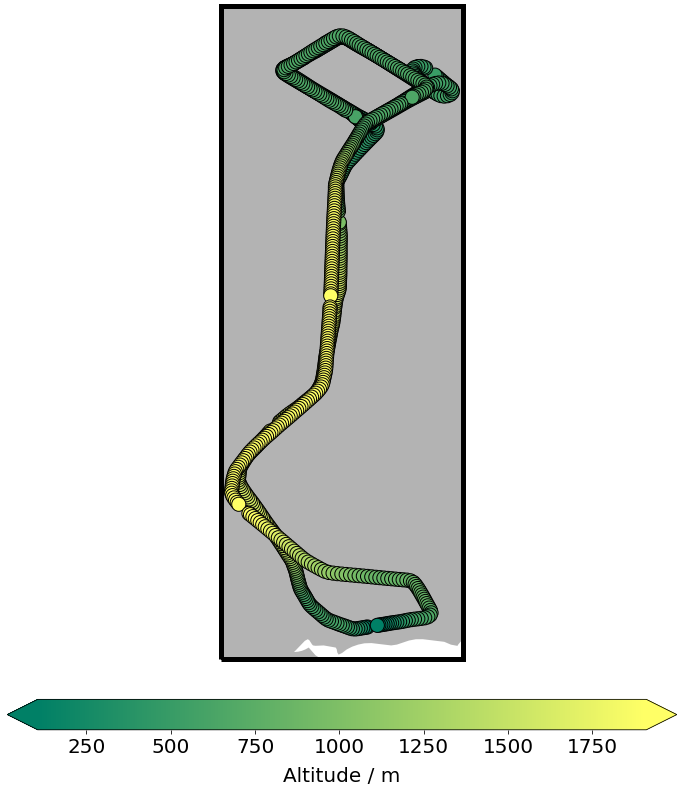

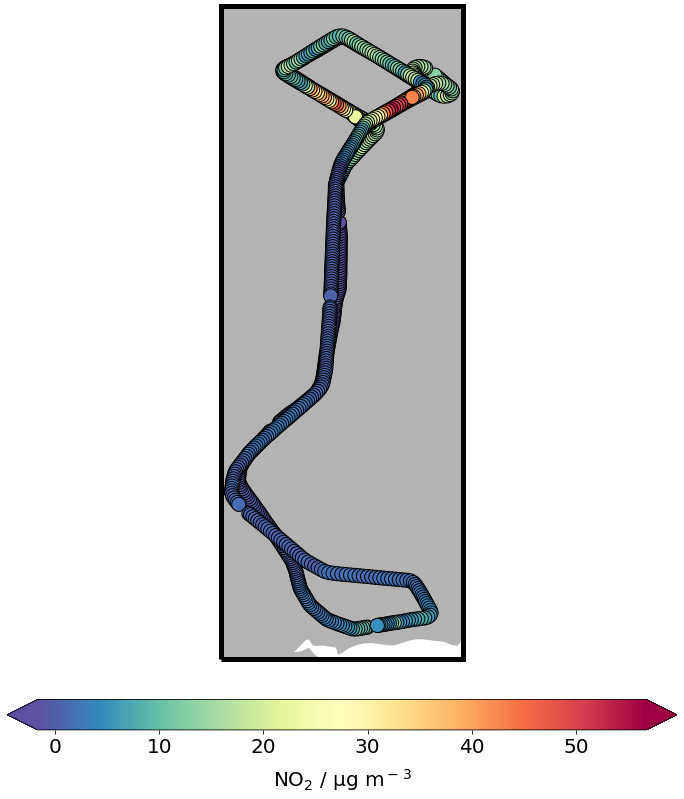

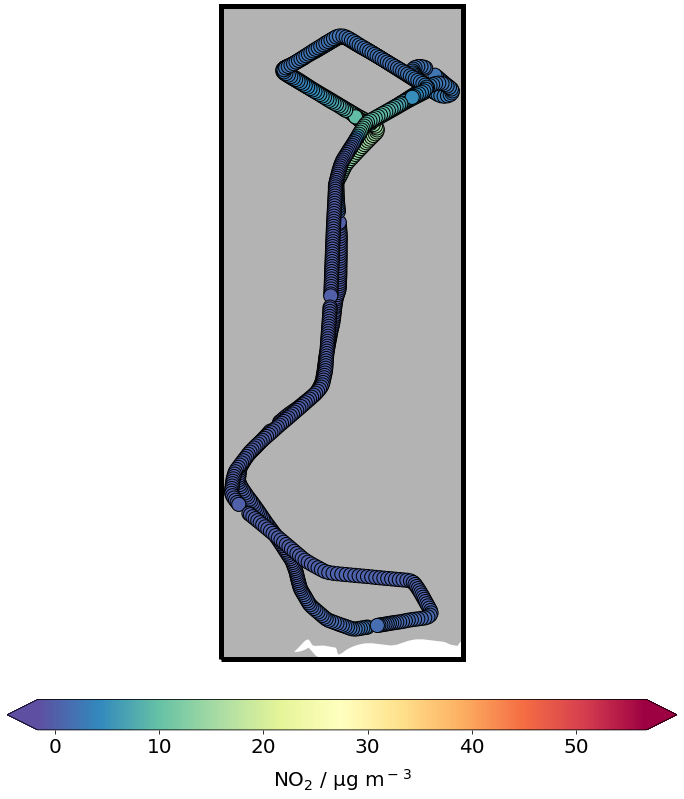

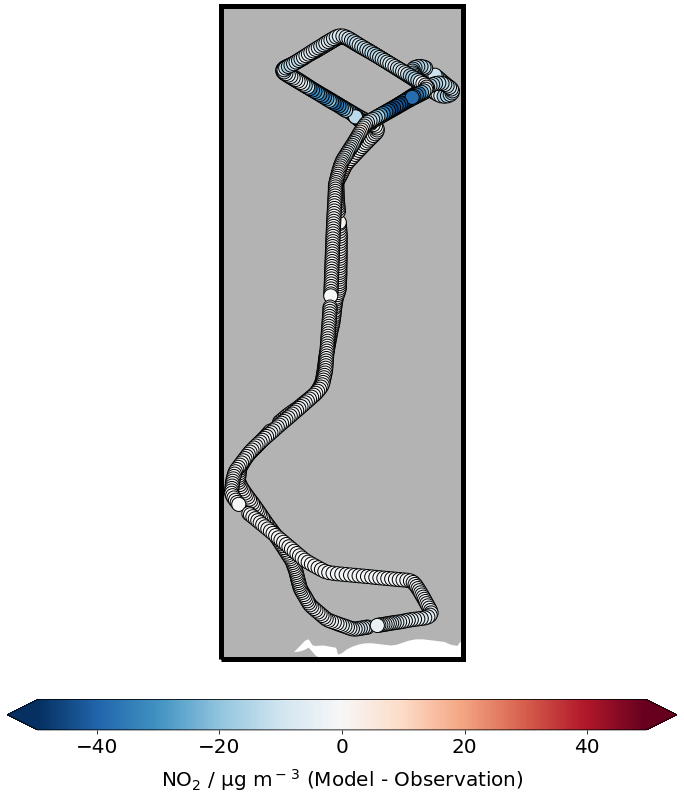

1.6750599919820193 6.703436113630336


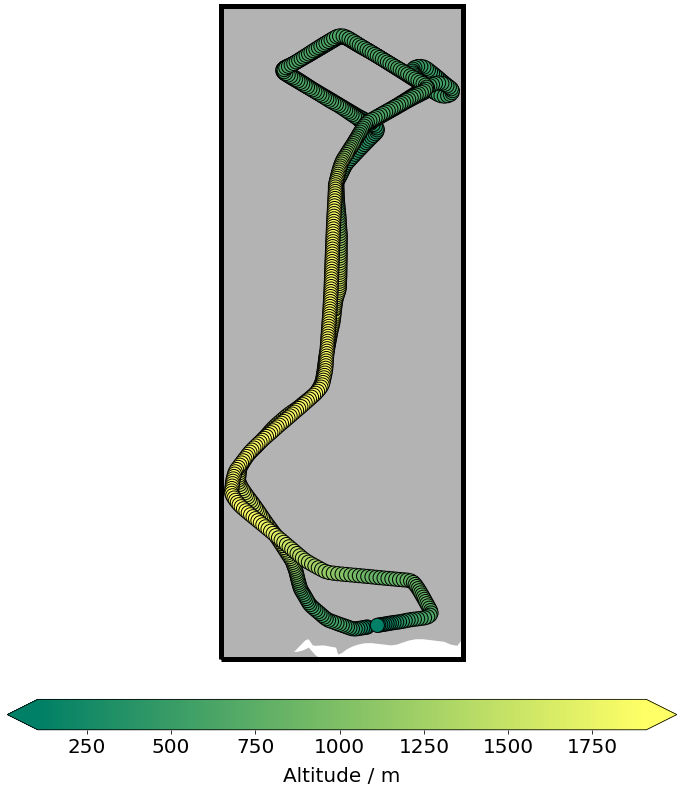

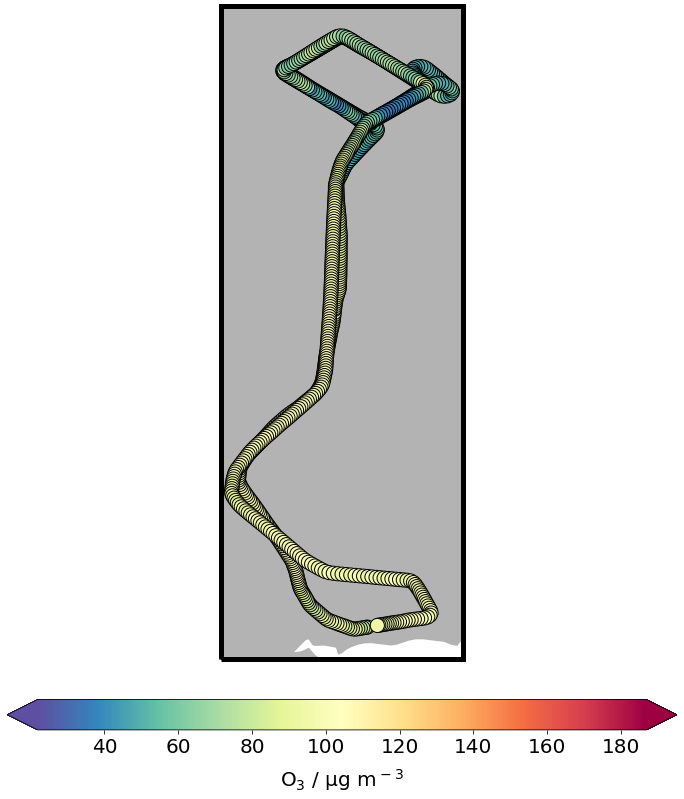

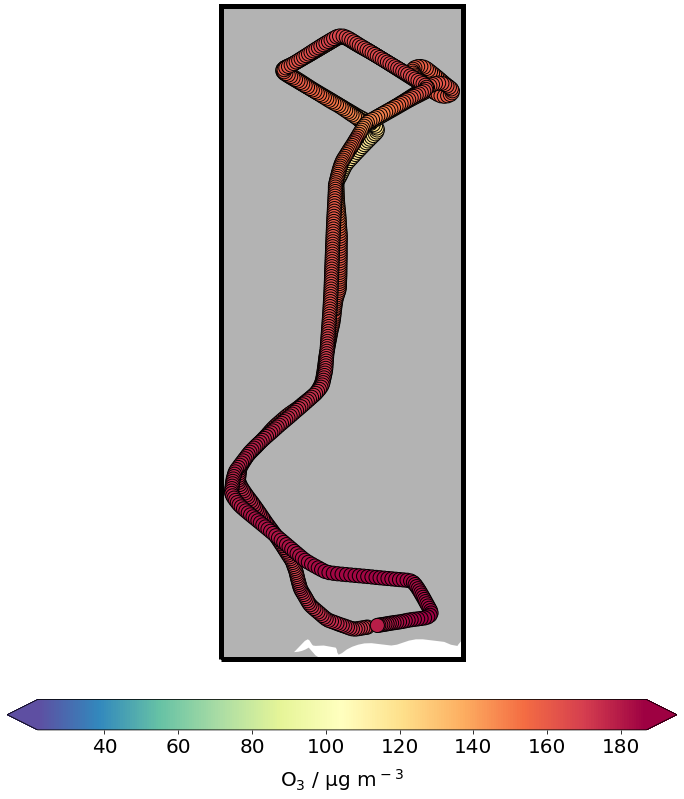

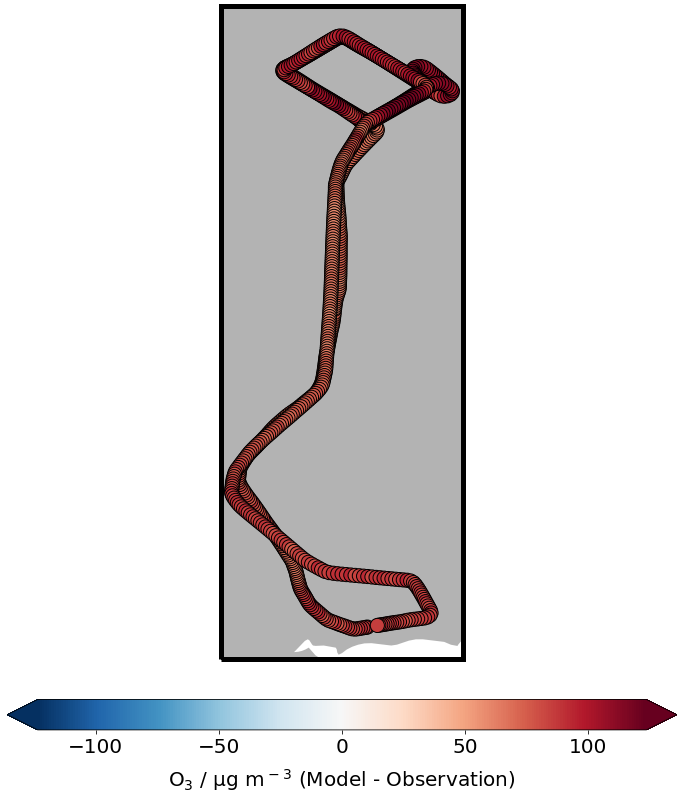

1.6750599919820193 6.703436113630336


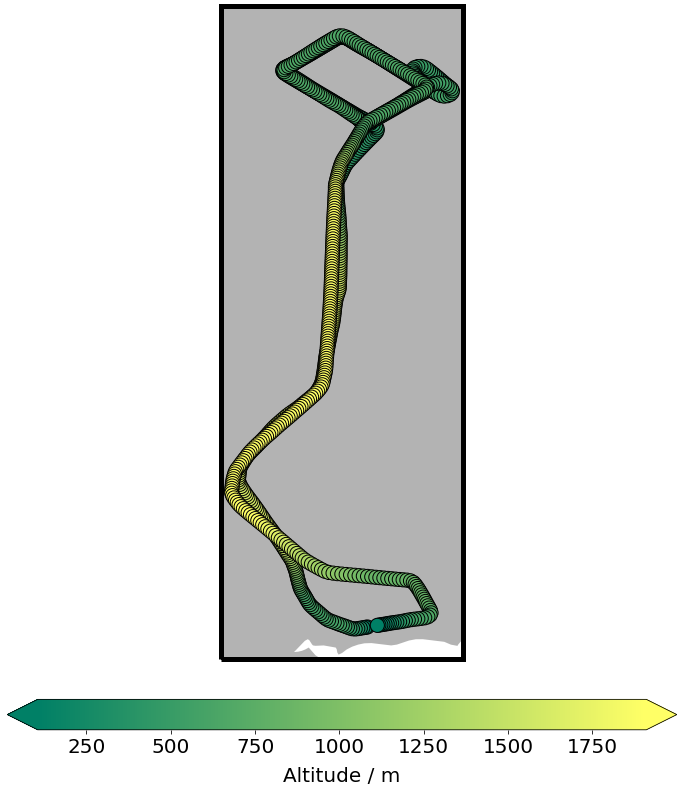

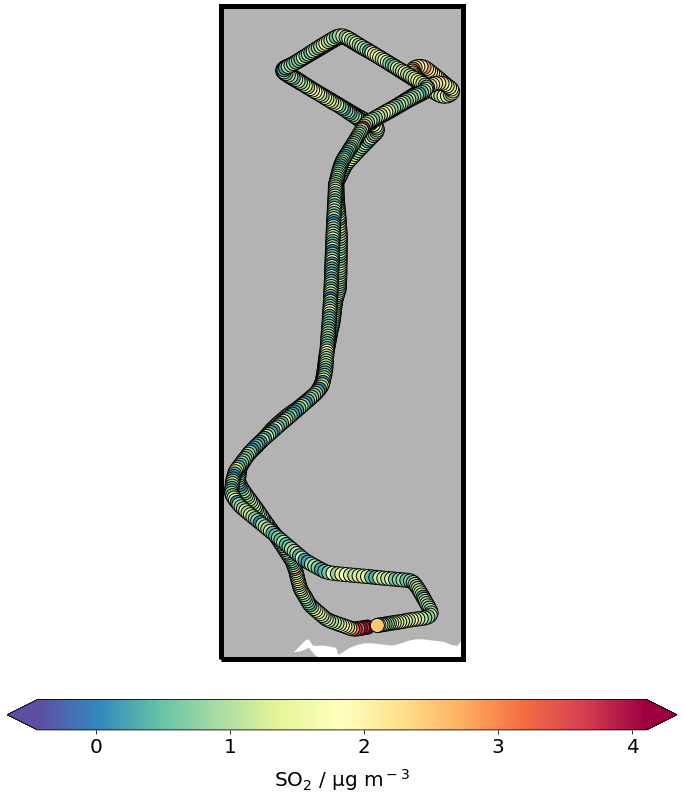

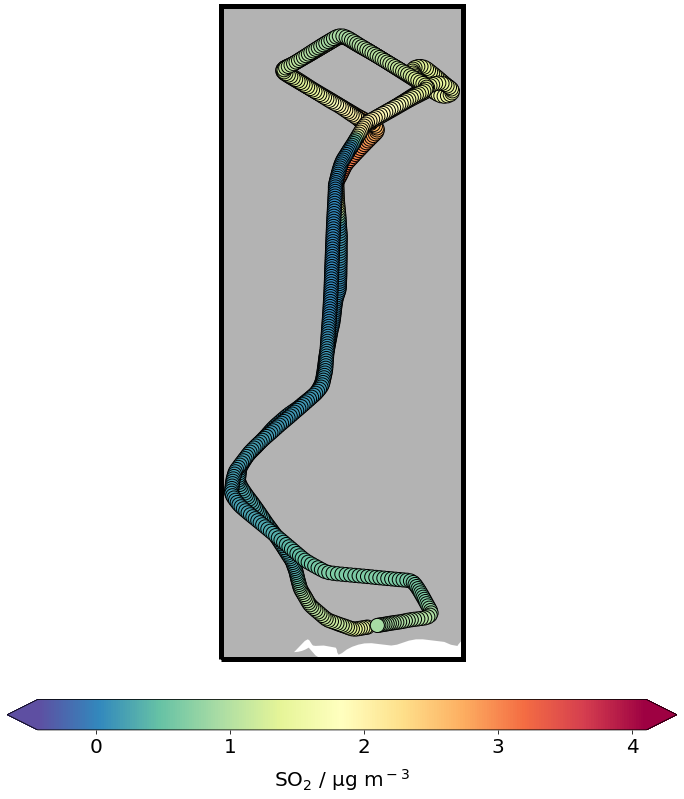

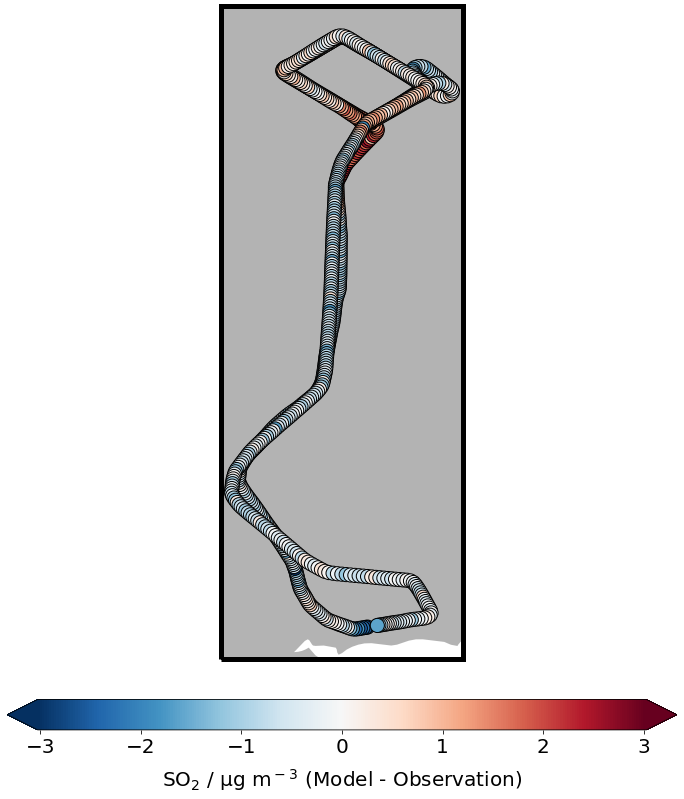

1.6750599919820193 6.703436113630336


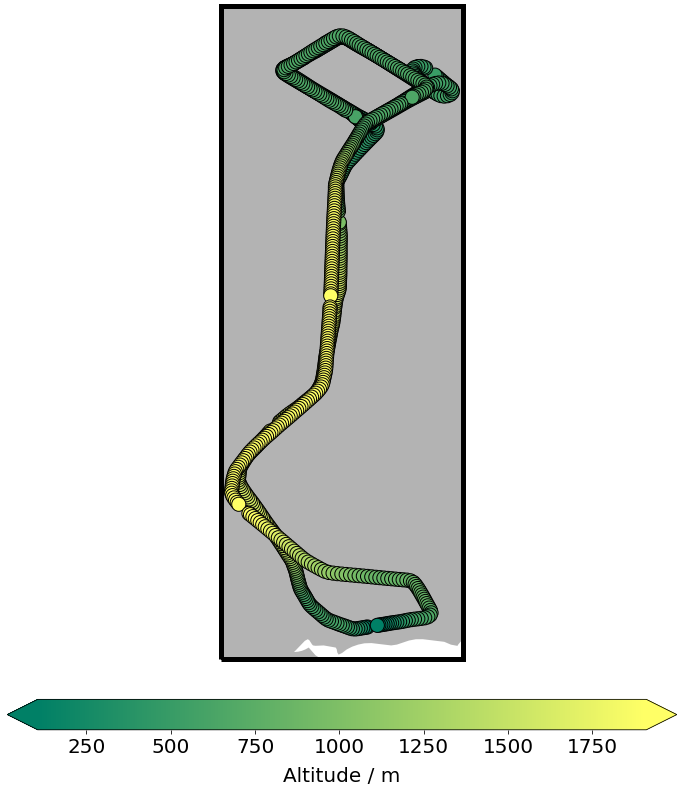

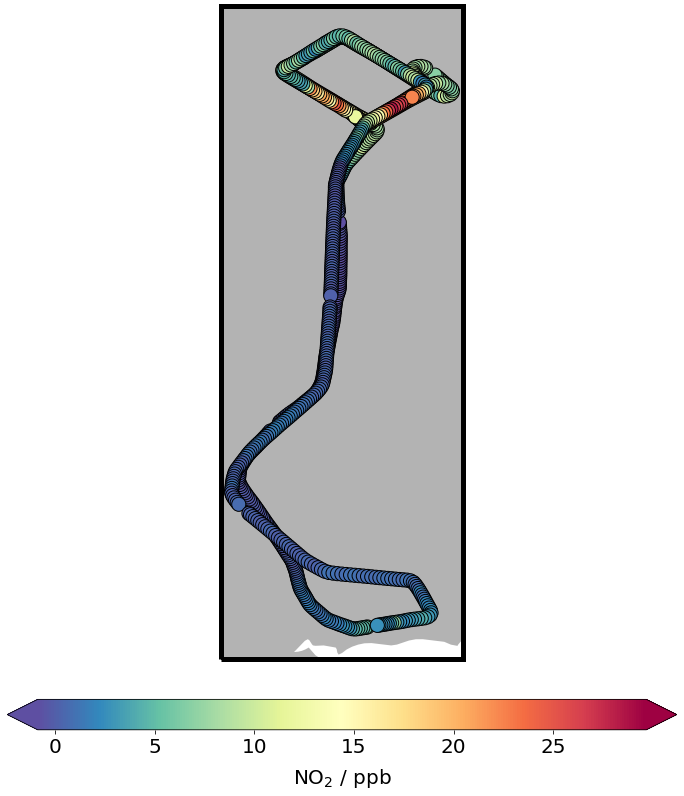

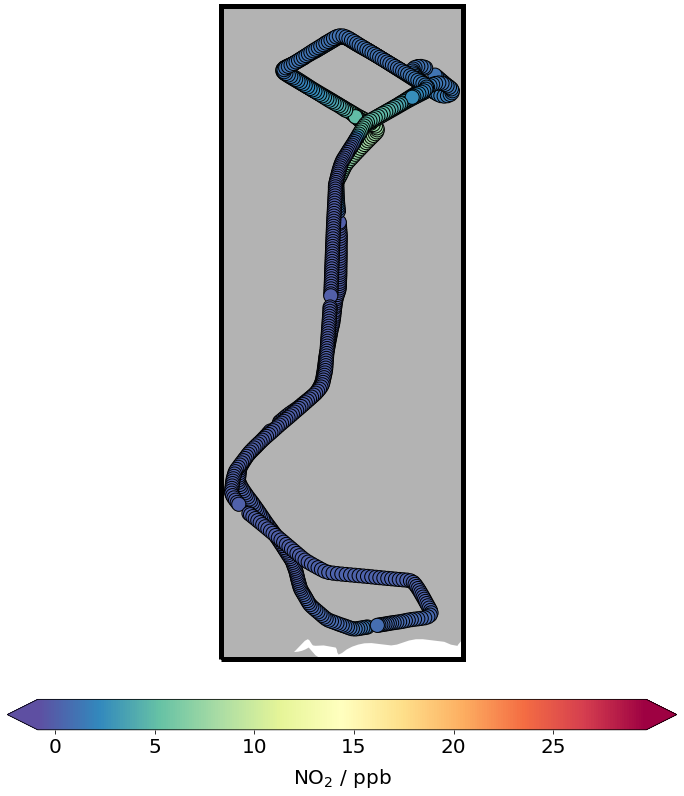

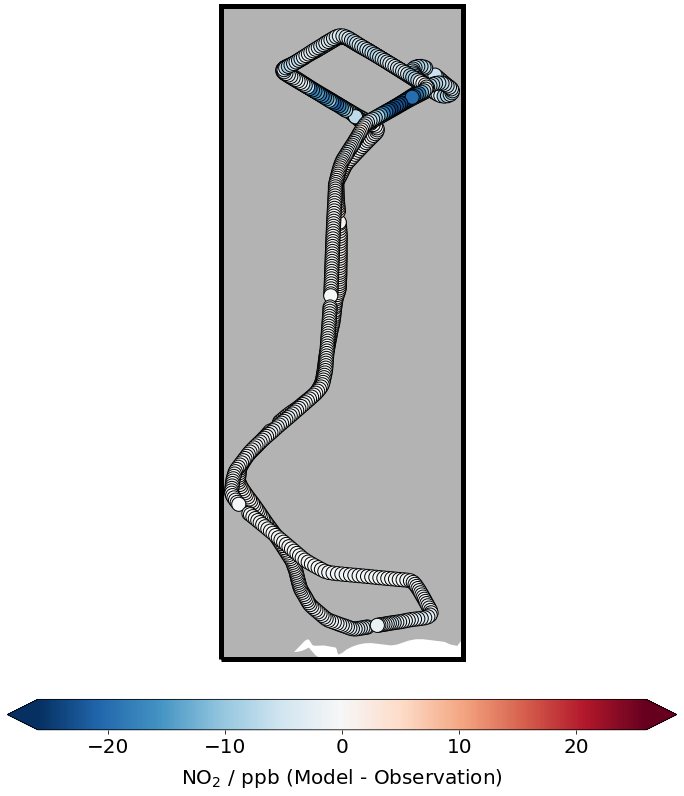

1.6750599919820193 6.703436113630336


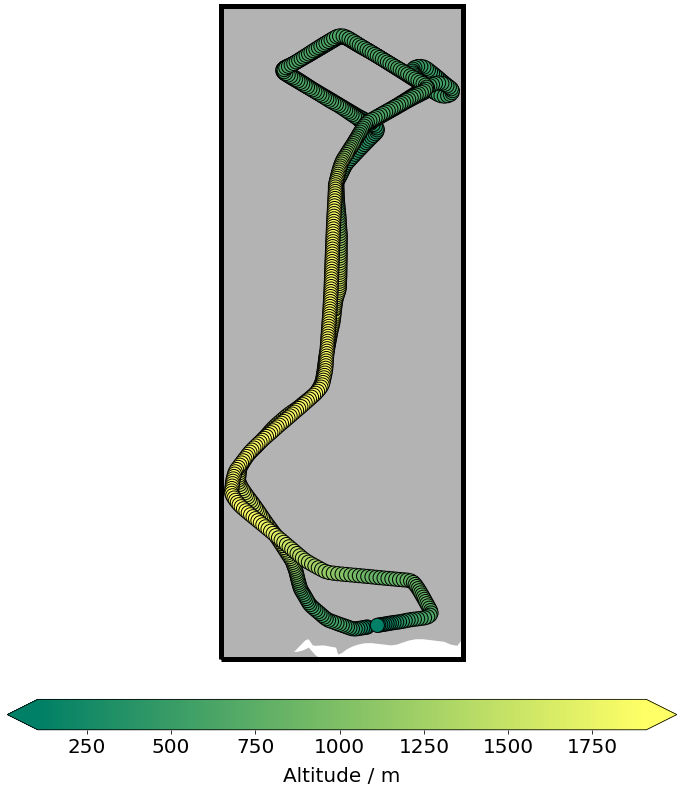

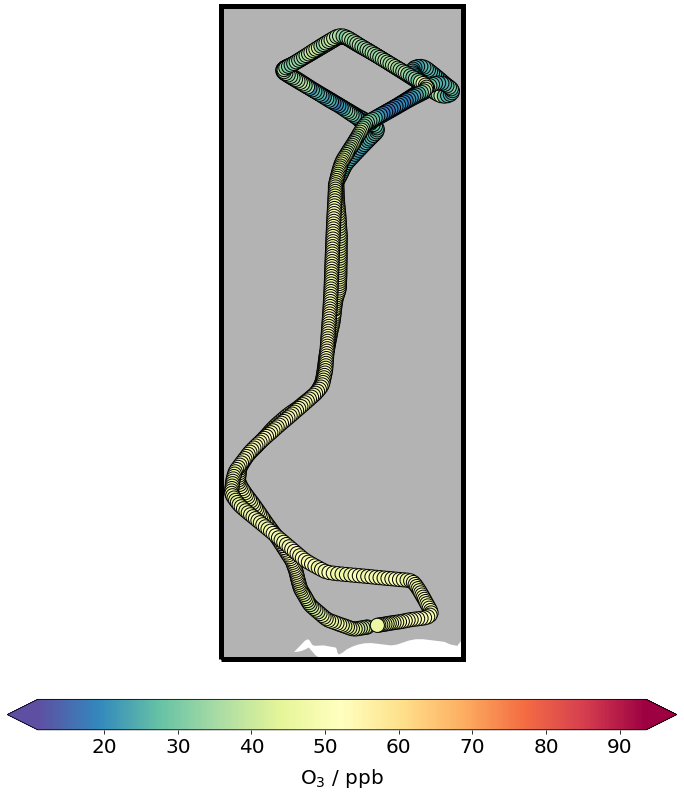

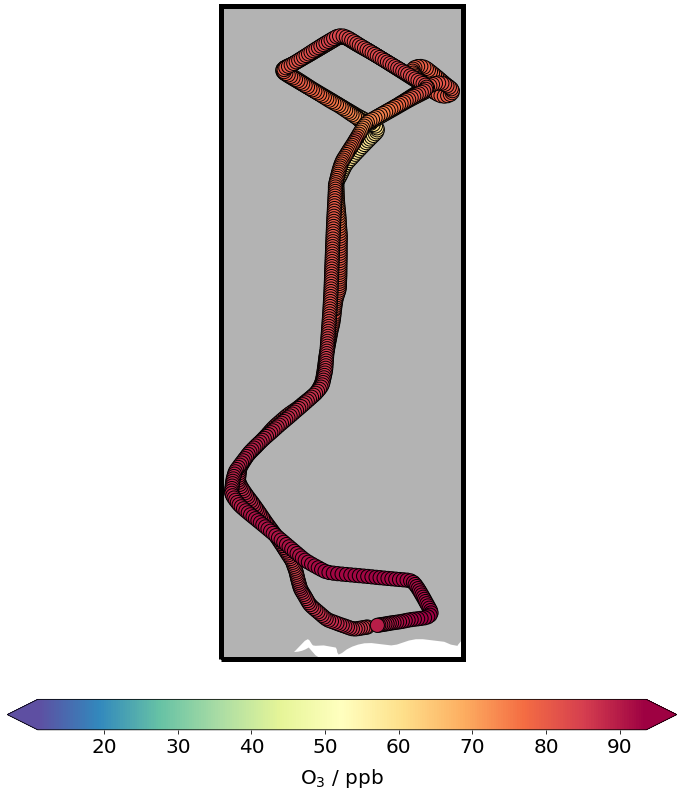

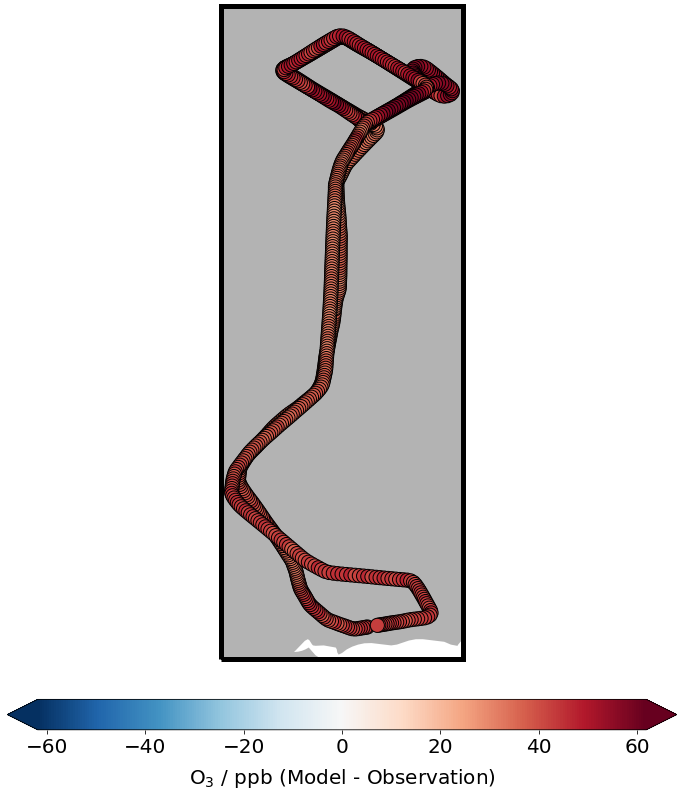

1.6750599919820193 6.703436113630336


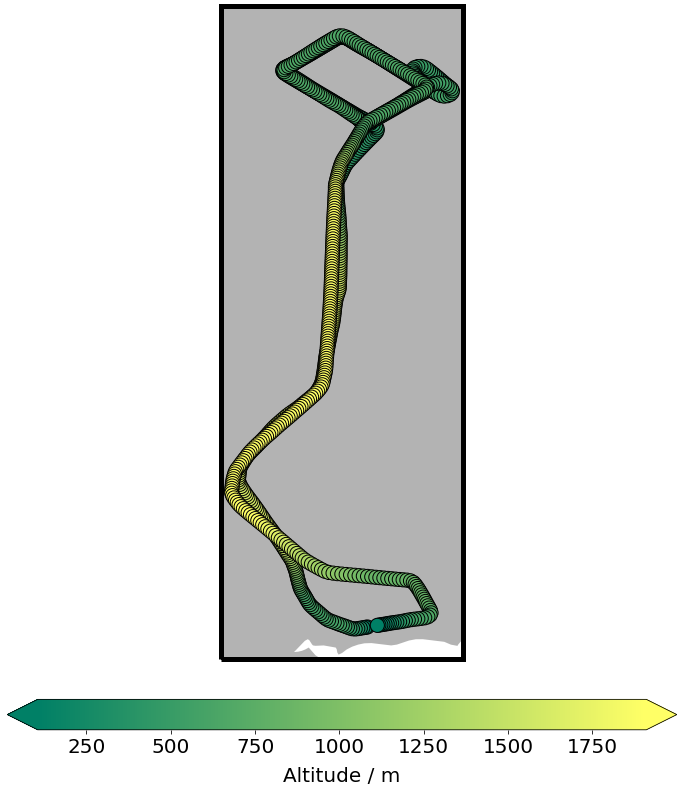

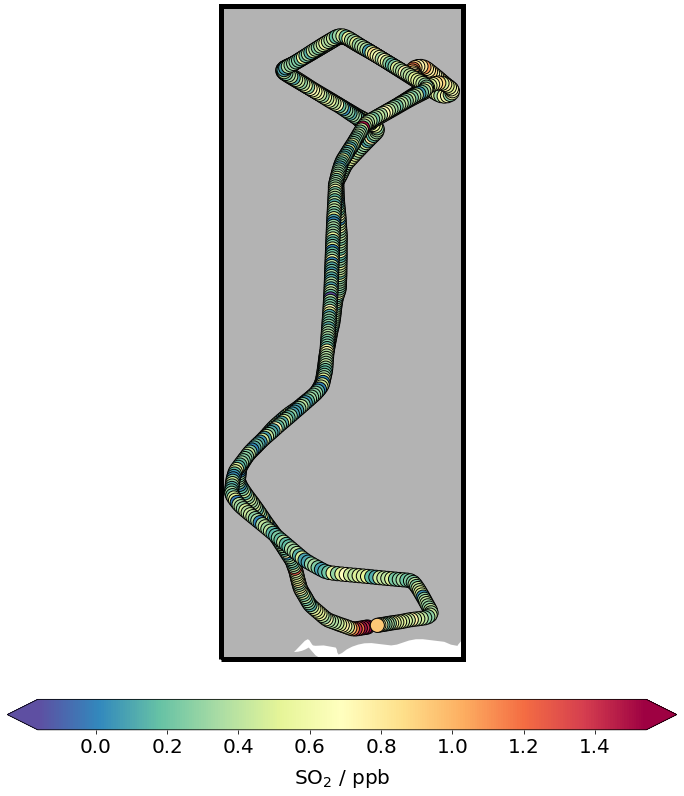

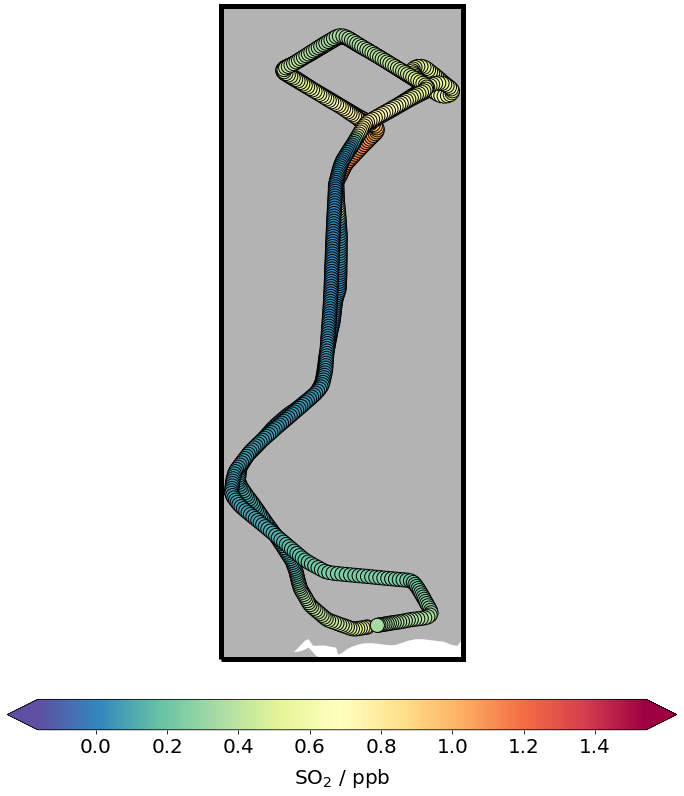

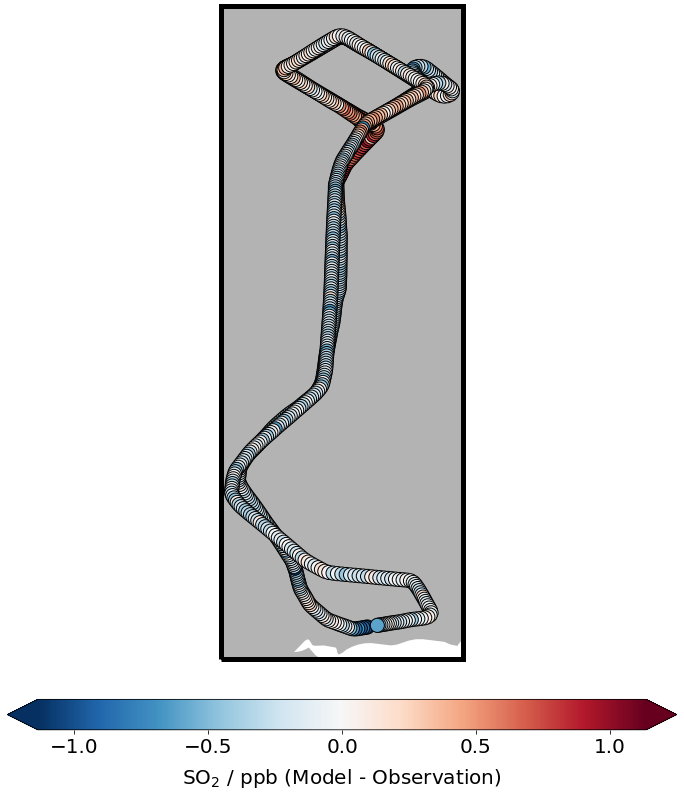

1.6750599919820193 6.703436113630336


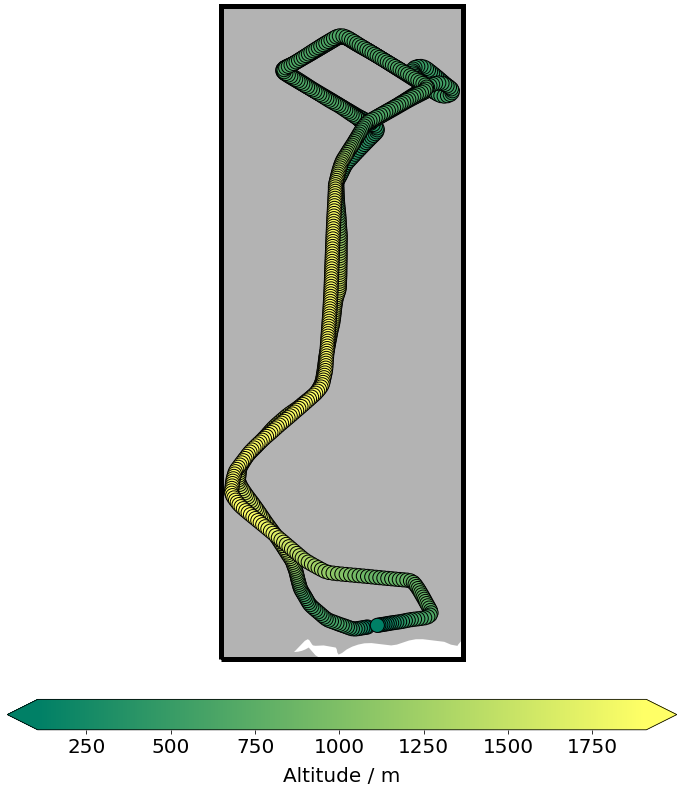

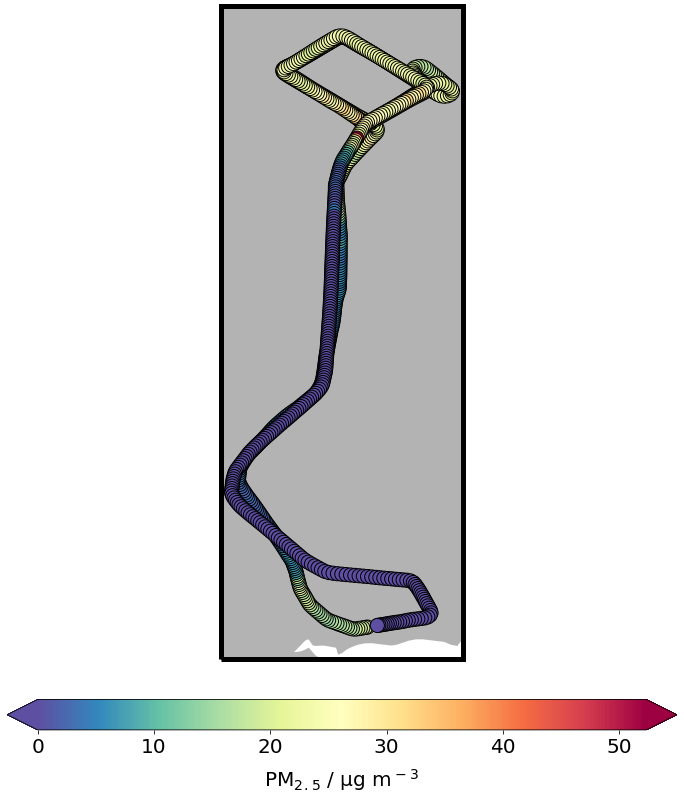

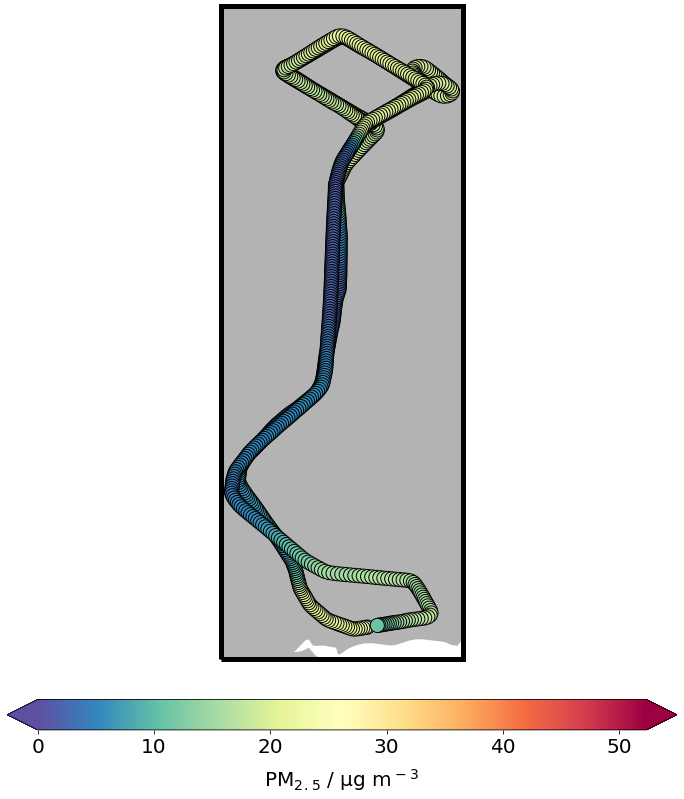

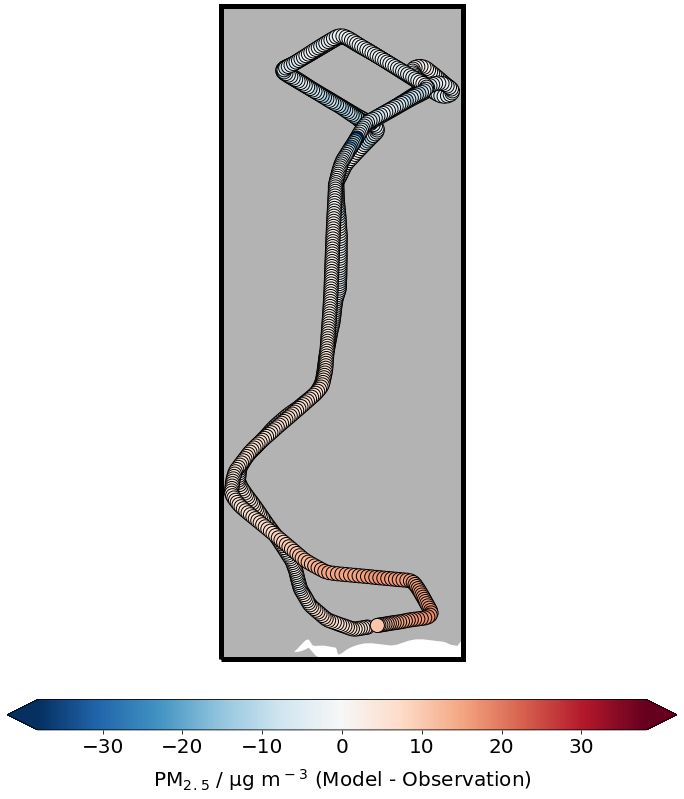

In [4]:
species_dict = pre.species_dictionary()
setup = pre.setup_notebook(flight_number)
optns = setup[6]
for key in species_dict.keys() :
    code,label,column_key,unit_conv = species_dict[key]['code'],species_dict[key]['label'],species_dict[key]['column_key'],species_dict[key]['unit_conv']

        # Combine the aircraft and model data.
    df = pre.combine_data(setup,code)

        # Resample the data.
    resample_df = pre.resample_data(df,optns['resample_time'],optns['avg_method'],optns['min_method'],optns['max_method'])
    wind_df = pre.resample_wind_data(df,optns['resample_time']) #not used?

    plot_maps(resample_df,wind_df,setup[5],key,label)
